**Individual Challenge:**



*   Hackathon: #bdthackathon
*   Author: Marta Aliu Carrascosa



## Import Packages

In [ ]:
#Install optuna. This is the hyperparameter optimization framework that will be used to obtain the best-performing machine learning model and hyperparameters
!pip install optuna

#Install CatBoost, a machine learning algorithm that uses gradient boosting on decision trees
!pip install catboost

In [ ]:
#Import all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import catboost as cb
import optuna
import seaborn as sns

## Exploratory Data Analysis (EDA)

In [ ]:
#Load and view the first rows of the dataset
df = pd.read_csv('https://raw.githubusercontent.com/nuwe-io/bdt_hackathon/main/particles.csv')
df.head()

,alpha_1,alpha_2,alpha_3,beta_1,beta_2,beta_3,gamma_1,gamma_2,gamma_3,theta,noise,Particle
0,NaN,-59.730861,396.928619,9.761703,-137.558889,159.598109,-137.558889,53.930955,154.713810,-232.436087,99.243140,3
1,147.781782,153.729532,111.998962,-174.941235,-97.888332,26.493593,-97.888332,-30.506871,-166.347802,-195.010710,20.242743,0
2,242.220616,82.947635,-102.073856,116.334349,-101.746729,176.452824,-101.746729,-33.419984,44.082548,-173.928682,3.806943,1
3,140.542085,-110.129037,215.560355,-11.927860,-11.257902,21.648833,-11.257902,240.685681,133.441269,-276.382025,0.336025,0
4,169.367809,-92.182925,159.995515,-272.230740,-80.483153,-97.698901,-80.483153,16.251613,-13.177148,-100.316959,24.459551,0


In [ ]:
#First, let's examine the main information of this dataset. All the fields are floats except for the labels to predict. Columns 0, 4, 5, 7, 8 and 9 have null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127321 entries, 0 to 127320
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha_1   109132 non-null  float64
 1   alpha_2   127321 non-null  float64
 2   alpha_3   127321 non-null  float64
 3   beta_1    127321 non-null  float64
 4   beta_2    127131 non-null  float64
 5   beta_3    127206 non-null  float64
 6   gamma_1   127321 non-null  float64
 7   gamma_2   126594 non-null  float64
 8   gamma_3   117897 non-null  float64
 9   theta     126595 non-null  float64
 10  noise     127321 non-null  float64
 11  Particle  127321 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 11.7 MB


In [ ]:
df.drop_duplicates(inplace=True)
print(df.shape) #There are no duplicates since it's the same shape as before

(127321, 12)


In [ ]:
df.dropna(inplace=True)
print(df.shape) #29371 rows have been dropped due to having NaN values

(97950, 12)


In [ ]:
df.describe() #beta_2 and gamma_1 have the same data except for the fact that beta_2 has null values. Once the NaN rows are dropped, these two columns are the same

,alpha_1,alpha_2,alpha_3,beta_1,beta_2,beta_3,gamma_1,gamma_2,gamma_3,theta,noise,Particle
count,97950.000000,97950.000000,97950.000000,97950.000000,97950.000000,97950.000000,97950.000000,97950.000000,97950.000000,97950.000000,97950.000000,97950.000000
mean,-10.627942,-0.317739,49.523219,7.677710,47.025191,0.509464,47.025191,-0.187794,-20.733795,-61.563891,50.176233,1.644523
std,153.034325,99.971219,221.687807,165.037300,160.122152,99.958799,160.122152,99.754911,160.510171,147.139060,28.788385,1.469749
min,-779.841923,-391.102365,-1263.945127,-701.930722,-625.404967,-448.118855,-625.404967,-435.684650,-719.937495,-653.437102,0.000716,0.000000
25%,-118.826853,-68.081011,-102.512012,-108.931998,-58.840068,-66.775929,-58.840068,-67.084893,-132.563851,-159.246777,25.230381,0.000000
50%,-0.518598,-0.271609,48.643431,6.008264,56.000204,0.575132,56.000204,-0.409181,-14.273767,-75.208456,50.286239,2.000000
75%,101.959609,66.702353,198.464760,123.225646,156.150775,67.732414,156.150775,66.655890,95.191716,21.181326,75.079537,2.000000
max,698.044837,444.209708,1383.265329,666.078562,726.063419,448.925730,726.063419,422.094377,682.413287,689.548943,99.993348,7.000000


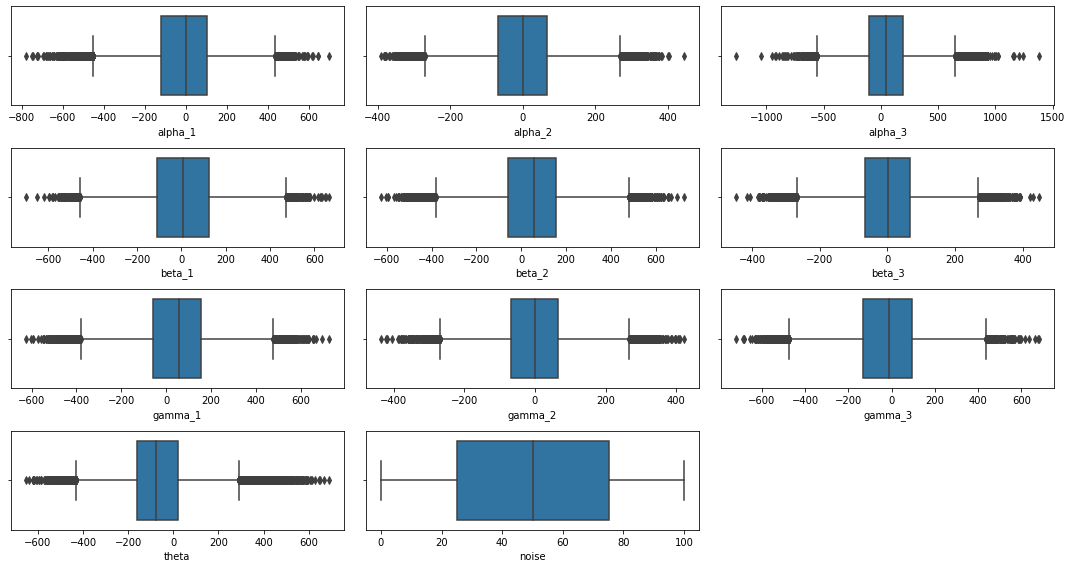

In [ ]:
#Check for outliers. There are some outliers in every field, but I am leaving them as they are not too extreme.
fig, axs = plt.subplots(4,3, figsize = (15,8))
plt1 = sns.boxplot(x=df['alpha_1'], ax = axs[0,0])
plt2 = sns.boxplot(x=df['alpha_2'], ax = axs[0,1])
plt3 = sns.boxplot(x=df['alpha_3'], ax = axs[0,2])
plt1 = sns.boxplot(x=df['beta_1'], ax = axs[1,0])
plt2 = sns.boxplot(x=df['beta_2'], ax = axs[1,1])
plt3 = sns.boxplot(x=df['beta_3'], ax = axs[1,2])
plt1 = sns.boxplot(x=df['gamma_1'], ax = axs[2,0])
plt2 = sns.boxplot(x=df['gamma_2'], ax = axs[2,1])
plt3 = sns.boxplot(x=df['gamma_3'], ax = axs[2,2])
plt1 = sns.boxplot(x=df['theta'], ax = axs[3,0])
plt2 = sns.boxplot(x=df['noise'], ax = axs[3,1])
fig.delaxes(axs[3][2])
plt.tight_layout()

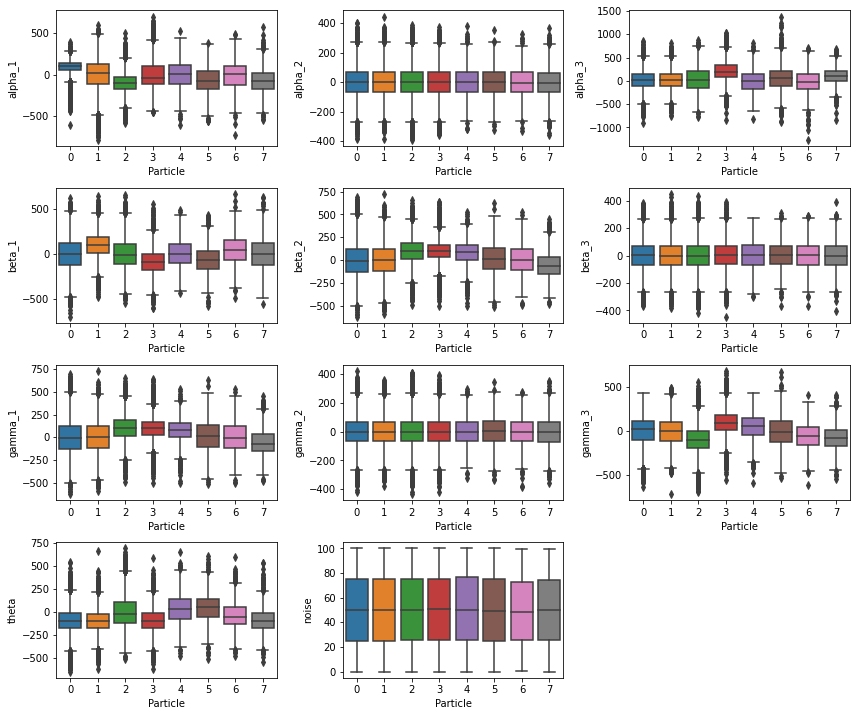

In [ ]:
#Looking at the boxplots, data is distributed similarly across all particle labels, especially for the alpha_2, beta_3, gamma_2 and noise columns.
fig, axs = plt.subplots(4,3, figsize = (12,10))
plt1 = sns.boxplot(x=df['Particle'], y=df['alpha_1'], ax = axs[0,0])
plt2 = sns.boxplot(x=df['Particle'], y=df['alpha_2'], ax = axs[0,1])
plt3 = sns.boxplot(x=df['Particle'], y=df['alpha_3'], ax = axs[0,2])
plt1 = sns.boxplot(x=df['Particle'], y=df['beta_1'], ax = axs[1,0])
plt2 = sns.boxplot(x=df['Particle'], y=df['beta_2'], ax = axs[1,1])
plt3 = sns.boxplot(x=df['Particle'], y=df['beta_3'], ax = axs[1,2])
plt1 = sns.boxplot(x=df['Particle'], y=df['gamma_1'], ax = axs[2,0])
plt2 = sns.boxplot(x=df['Particle'], y=df['gamma_2'], ax = axs[2,1])
plt3 = sns.boxplot(x=df['Particle'], y=df['gamma_3'], ax = axs[2,2])
plt1 = sns.boxplot(x=df['Particle'], y=df['theta'], ax = axs[3,0])
plt2 = sns.boxplot(x=df['Particle'], y=df['noise'], ax = axs[3,1])
fig.delaxes(axs[3][2])
plt.tight_layout()

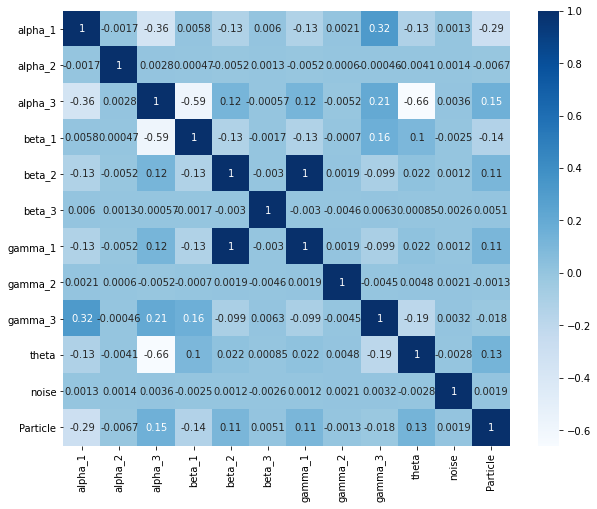

In [ ]:
#pairwise correlation matrix between columns. There is perfect correlation between beta_2 and gamma_1 (since they are the same once NaNs are dropped) so we can drop one of them.
#alpha_3 and beta_1, and alpha_3 and theta have very strong negative correlation.
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap="Blues")
plt.show()

In [ ]:
#Drop column gamma_1, since it has the same data as beta_2. Also dropping alpha_2, beta_3, gamma_2 and noise columns since their correlation with the Particle column 
#is too small and the boxplots showed very little variation across labels for these variables
df.drop(columns=['gamma_1', 'gamma_2', 'noise', 'beta_3', 'alpha_2'], inplace=True)

[Text(0, 0.5, 'Particle Count (Number of Entries)'),
 Text(0.5, 0, 'Particle Label')]

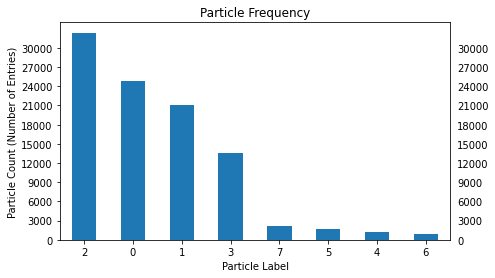

In [ ]:
#There are 8 particle labels. Let's have a look at their frequency based on the number of entries in the dataset for each label. We can see that it is heavily imbalanced:
#some particles have more than 20000 entries yet others only have around 1000 entries.
classes = df['Particle'].value_counts()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(labelright=True)
classes.plot(kind='bar', figsize=(7,4), yticks=np.arange(0, max(classes)+1, 3000), rot=0,
                title='Particle Frequency').set(xlabel='Particle Label', ylabel='Particle Count (Number of Entries)')

In [ ]:
#Let's split the data into training and test dataset. The split is done in a stratified way to make sure that there are enough entries for each particle in both sets 
#and that each split has the same proportion of entries per particle (since they are imbalanced). The split ratio chosen is 80% training and 20% test.
#Setting random state to a fixed value in order to compare runs and algorithms.
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((78360, 6), (19590, 6), (78360,), (19590,))

## Sklearn Classification Algorithms

Firstly, three different classification algorithms from the Sklearn library are used in an Optuna wrapper to choose both the best classifier and the best hyperparameters of that classifier. To do so, cross-validation is done on the train dataset (stratified split, 4 folds) and the mean F1-score (macro) across all folds is the value to maximize. After that, the model is trained on the entire training dataset with the hyperparameters selected and used on the test set to evaluate performance.

In [ ]:
#Optuna wrapper to optimize both the classifier and the hyperparameters of the classifier
def objective(trial):
  classifier_name = trial.suggest_categorical("classifier", ["KNeighborsClassifier", "DecisionTreeClassifier", "RandomForest"])

  if classifier_name == "KNeighborsClassifier":
    neighbors = trial.suggest_int("neighbors", 3, 15)
    weights = trial.suggest_categorical("weights", ['uniform', 'distance'])
    classifier_obj = KNeighborsClassifier(weights=weights, n_neighbors=neighbors)
  elif classifier_name == "RandomForest":
    rf_max_depth = trial.suggest_int("rf_max_depth", 10, 40, log=True)
    rf_estimators = trial.suggest_int("rf_estimators", 10, 100)
    classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_estimators)
  elif classifier_name == "DecisionTreeClassifier":
    dt_max_depth = trial.suggest_int("dt_max_depth", 10, 40, log=True)
    classifier_obj = DecisionTreeClassifier(max_depth=dt_max_depth)

  folds = StratifiedKFold(n_splits=4)                                           #stratified K-fold cross-validator with 4 folds
  score = cross_val_score(classifier_obj, X_train, y_train, cv=folds, scoring='f1_macro', n_jobs=-1)
  return score.mean()

study = optuna.create_study(direction="maximize")                               #the objective is to maximize the metric selected (F1-score macro)
study.optimize(objective, n_trials=50, show_progress_bar=True)                  #50 different trials are run to select the best model and parameters
print("Best Value: ", study.best_trial.value)
print("Best Parameters: ")
for key, value in study.best_trial.params.items():
  print(f" {key}: {value}")

[I 2021-06-13 09:48:36,578] A new study created in memory with name: no-name-1323119d-4dbb-4218-9504-b4daed858901
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



[I 2021-06-13 09:49:31,278] Trial 0 finished with value: 0.566922554665264 and parameters: {'classifier': 'DecisionTreeClassifier', 'dt_max_depth': 25}. Best is trial 0 with value: 0.566922554665264.
[I 2021-06-13 09:49:46,986] Trial 1 finished with value: 0.5455510858157715 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 14, 'rf_estimators': 34}. Best is trial 0 with value: 0.566922554665264.
[I 2021-06-13 09:50:27,282] Trial 2 finished with value: 0.5236717410746643 and parameters: {'classifier': 'DecisionTreeClassifier', 'dt_max_depth': 12}. Best is trial 0 with value: 0.566922554665264.
[I 2021-06-13 09:50:31,898] Trial 3 finished with value: 0.5126431461861933 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 12, 'rf_estimators': 11}. Best is trial 0 with value: 0.566922554665264.
[I 2021-06-13 09:50:34,588] Trial 4 finished with value: 0.5734879237721167 and parameters: {'classifier': 'KNeighborsClassifier', 'neighbors': 14, 'weights': 'distance'}. Bes

In [ ]:
#Using the classifier and the hyperparameters chosen, first train on the entire training dataset and then predict the labels on the test dataset
classifier_obj = KNeighborsClassifier(weights='distance', n_neighbors=8)
classifier_obj.fit(X_train, y_train)
pred = classifier_obj.predict(X_test)
f1_macro = f1_score(y_test, pred, average='macro')
print(f1_macro)

0.6025659710101983


The best sklearn machine learning algorithm on the dataset is K-Nearest Neighbors with the following hyperparameters: 

*   Neighbors: 8
*   Weights (weight function): distance

This achieves a mean F1-score (macro) of 0.5802476718368375 (58.02%) during cross-validation and an F1-score (macro) of 0.6025659710101983 (60.26%) on the test dataset.

## CatBoost Classifier

A CatBoost classifier is also used and optimized using the Optuna framework through cross-validation in the same way as before. After that, the model is evaluated on the test dataset.

In [ ]:
#Optuna wrapper to optimize the hyperparameters of the CatBoost classifier
def objective(trial):
  param = {
      'iterations': trial.suggest_int('iterations', 350, 500),                  #maximum number of trees that can be built                   
      'depth': trial.suggest_int('depth', 8, 10),                               #depth of the tree     
      'learning_rate': trial.suggest_float('learning_rate', 0.1, 0.3),          #learning rate    
      'random_strength': trial.suggest_float('random_strength', 0, 100),        #the amount of randomness for scoring splits when the tree structure is selected           
      'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),                 #coefficient at the L2 regularization term of the cost function
      'logging_level': 'Silent'}                                                #to avoid output of logging information (only the Optuna information is printed)

  cb_model = cb.CatBoostClassifier(**param)
  folds = StratifiedKFold(n_splits=4)                                           #stratified K-fold cross-validator with 4 folds
  score = cross_val_score(cb_model, X_train, y_train, cv=folds, scoring='f1_macro', n_jobs=-1)
  return score.mean()

study = optuna.create_study(direction="maximize")                               #the objective is to maximize the metric selected (F1-score macro)
study.optimize(objective, n_trials=20, show_progress_bar=True)                  #20 different trials are run to select the best hyperparameters
print("Best Value: ", study.best_trial.value)
print("Best Parameters: ")
for key, value in study.best_trial.params.items():
  print(f" {key}: {value}")

[I 2021-06-13 07:46:32,180] A new study created in memory with name: no-name-a0d0ee0a-e442-4369-a690-57b0abafd7af
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



[I 2021-06-13 07:52:54,137] Trial 0 finished with value: 0.5886664776905712 and parameters: {'iterations': 351, 'depth': 10, 'learning_rate': 0.23924413896327923, 'random_strength': 88.01050338833024, 'l2_leaf_reg': 8.289163439958795}. Best is trial 0 with value: 0.5886664776905712.
[I 2021-06-13 07:57:06,613] Trial 1 finished with value: 0.5894722034769488 and parameters: {'iterations': 362, 'depth': 9, 'learning_rate': 0.2483583563567805, 'random_strength': 4.077948358989003, 'l2_leaf_reg': 2.9356924685812587}. Best is trial 1 with value: 0.5894722034769488.
[I 2021-06-13 08:01:03,557] Trial 2 finished with value: 0.59094939672328 and parameters: {'iterations': 487, 'depth': 8, 'learning_rate': 0.27391405528459256, 'random_strength': 30.505858695190856, 'l2_leaf_reg': 9.033859803948024}. Best is trial 2 with value: 0.59094939672328.
[I 2021-06-13 08:09:55,707] Trial 3 finished with value: 0.589987077503162 and parameters: {'iterations': 489, 'depth': 10, 'learning_rate': 0.2303026757

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[I 2021-06-13 08:33:09,468] Trial 6 finished with value: 0.5886377047948269 and parameters: {'iterations': 455, 'depth': 10, 'learning_rate': 0.16731621701045893, 'random_strength': 98.91462131005862, 'l2_leaf_reg': 5.3482615905462065}. Best is trial 2 with value: 0.59094939672328.
[I 2021-06-13 08:38:51,678] Trial 7 finished with value: 0.58809848093803 and parameters: {'iterations': 491, 'depth': 9, 'learning_rate': 0.2615066712350902, 'random_strength': 46.452796896782814, 'l2_leaf_reg': 2.5969012047865663}. Best is trial 2 with value: 0.59094939672328.
[I 2021-06-13 08:47:16,499] Trial 8 finished with value: 0.5880006721451416 and parameters: {'iterations': 465, 'depth': 10, 'learning_rate': 0.1259338088595599, 'random_strength': 90.13883489984845, 'l2_leaf_reg': 5.081161276949234}. Best is trial 2 with value: 0.59094939672328.
[I 2021-06-13 08:50:27,992] Trial 9 finished with value: 0.5878534351372683 and parameters: {'iterations': 390, 'depth': 8, 'learning_rate': 0.2252446738938

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[I 2021-06-13 09:14:04,973] Trial 14 finished with value: 0.5882835226280695 and parameters: {'iterations': 433, 'depth': 9, 'learning_rate': 0.19403193233893964, 'random_strength': 52.01444693980795, 'l2_leaf_reg': 1.0549597174101761}. Best is trial 12 with value: 0.5928332077182703.
[I 2021-06-13 09:19:32,146] Trial 15 finished with value: 0.5888822406821823 and parameters: {'iterations': 472, 'depth': 9, 'learning_rate': 0.19251332918005196, 'random_strength': 17.32890272302765, 'l2_leaf_reg': 1.4705387754989214}. Best is trial 12 with value: 0.5928332077182703.
[I 2021-06-13 09:24:28,798] Trial 16 finished with value: 0.5883376577970084 and parameters: {'iterations': 432, 'depth': 9, 'learning_rate': 0.15608855008395167, 'random_strength': 50.210242434766585, 'l2_leaf_reg': 3.9109630527178023}. Best is trial 12 with value: 0.5928332077182703.
[I 2021-06-13 09:29:56,637] Trial 17 finished with value: 0.5930981166853392 and parameters: {'iterations': 476, 'depth': 9, 'learning_rate':

In [ ]:
#Now the model is trained with the entire training dataset and the hyperparameters selected, then used to predict the labels of the test set
param = {
      'iterations': 476,                    
      'depth': 9,
      'learning_rate': 0.21083595159554427,    
      'random_strength': 58.404583912540765,                  
      'l2_leaf_reg': 2.053555129237073,               
      'logging_level': 'Silent'}                                                

cb_train = cb.Pool(X_train, y_train)
cb_model = cb.CatBoostClassifier(**param)
cb_model.fit(cb_train)
preds = cb_model.predict(X_test)
f1_macro = f1_score(y_test, preds, average='macro')
print("\n", f1_macro)



 0.6028103567729963


The best CatBoost hyperparameters for this dataset are:


*   Iterations: 476
*   Depth: 9
*   Learning_rate: 0.21083595159554427
*   Random_strength: 58.404583912540765
*   L2_leaf_reg: 2.053555129237073


This achieves a mean F1-score (macro) of 0.5930981166853392 (59.31%) during cross-validation and an F1-score (macro) of 0.6028103567729963 (60.28%) on the test dataset.

# Conclusion

This dataset contains 12 fields, of which the last one contains the labels to predict. As such, this is a multi-class classification problem. There are 8 possible labels, although the dataset is very imbalanced with regards to how many entries there are per label. This is the reason why stratified splitting was chosen both for cross-validation and for the train/test split. In terms of the data, there are many null fields, so those are removed first. This results in 97950 entries out of the initial 127321 entries. After looking at the correlation between variables, the column gamma_1 is dropped since it contains the exact same data as column beta_2. Additionally, from looking at the boxplots of each feature across the labels to predict, I decided to drop the variables alpha_2, beta_3, gamma_2 and noise because they show very little variation across labels and their correlation with the Particle field is extremely low.

With regardss to the machine learning algorithms, one model has been selected from the traditional Sklearn algorithms and one from the newest set of algorithms for gradient boosting on decision trees. **The model that performs the best both during cross-validation and on the test dataset is CatBoost, with a macro F1-score of 0.5931 (59.31%) during cross-validation and a macro F1-score of 0.6028 (60.28%) on the test dataset.** That is the final model that I choose for this task and this dataset because of its very good performance, it is faster than other algorithms (XGBoost and SVC, for example) and it is easy to implement. However, the Sklearn algorithm selected, K-Nearest Neighbors, is only slightly worse than CatBoost and yet it is much faster, so it would also be a good alternative for this dataset.

Additionally, I used Optuna to select the best hyperparameters since it is an optimization framework that is very easy to incorporate to any model and library that needs hyperparameter optimization and it allows for cross-validation within it.